In [2]:
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np

In [3]:
%matplotlib inline
sns.set(style="whitegrid")  

In [4]:
# 📁 2. Chargement des données
base_path = Path("data/train")  # Chemin à adapter si besoin
class_dirs = sorted([d for d in base_path.iterdir() if d.is_dir()])
class_names = [d.name for d in class_dirs]

In [5]:
# 📊 3. Compter le nombre d’images par classe
class_counts = {cls: len(list((base_path / cls).glob("*")))
                for cls in class_names}
df_counts = pd.DataFrame(list(class_counts.items()),
                         columns=["Classe", "Nb d'images"])

C:\Users\nanji\AppData\Local\Temp\ipykernel_34036\3895808416.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_counts, x="Classe", y="Nb d'images", palette="Set2")


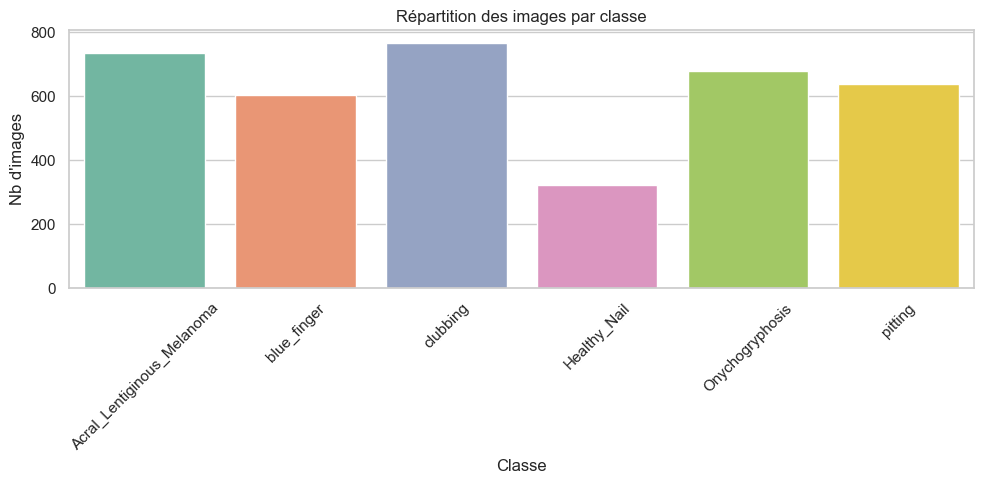

In [6]:
# 📈 4. Afficher la distribution des classes
plt.figure(figsize=(10, 5))
sns.barplot(data=df_counts, x="Classe", y="Nb d'images", palette="Set2")
plt.title("Répartition des images par classe")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

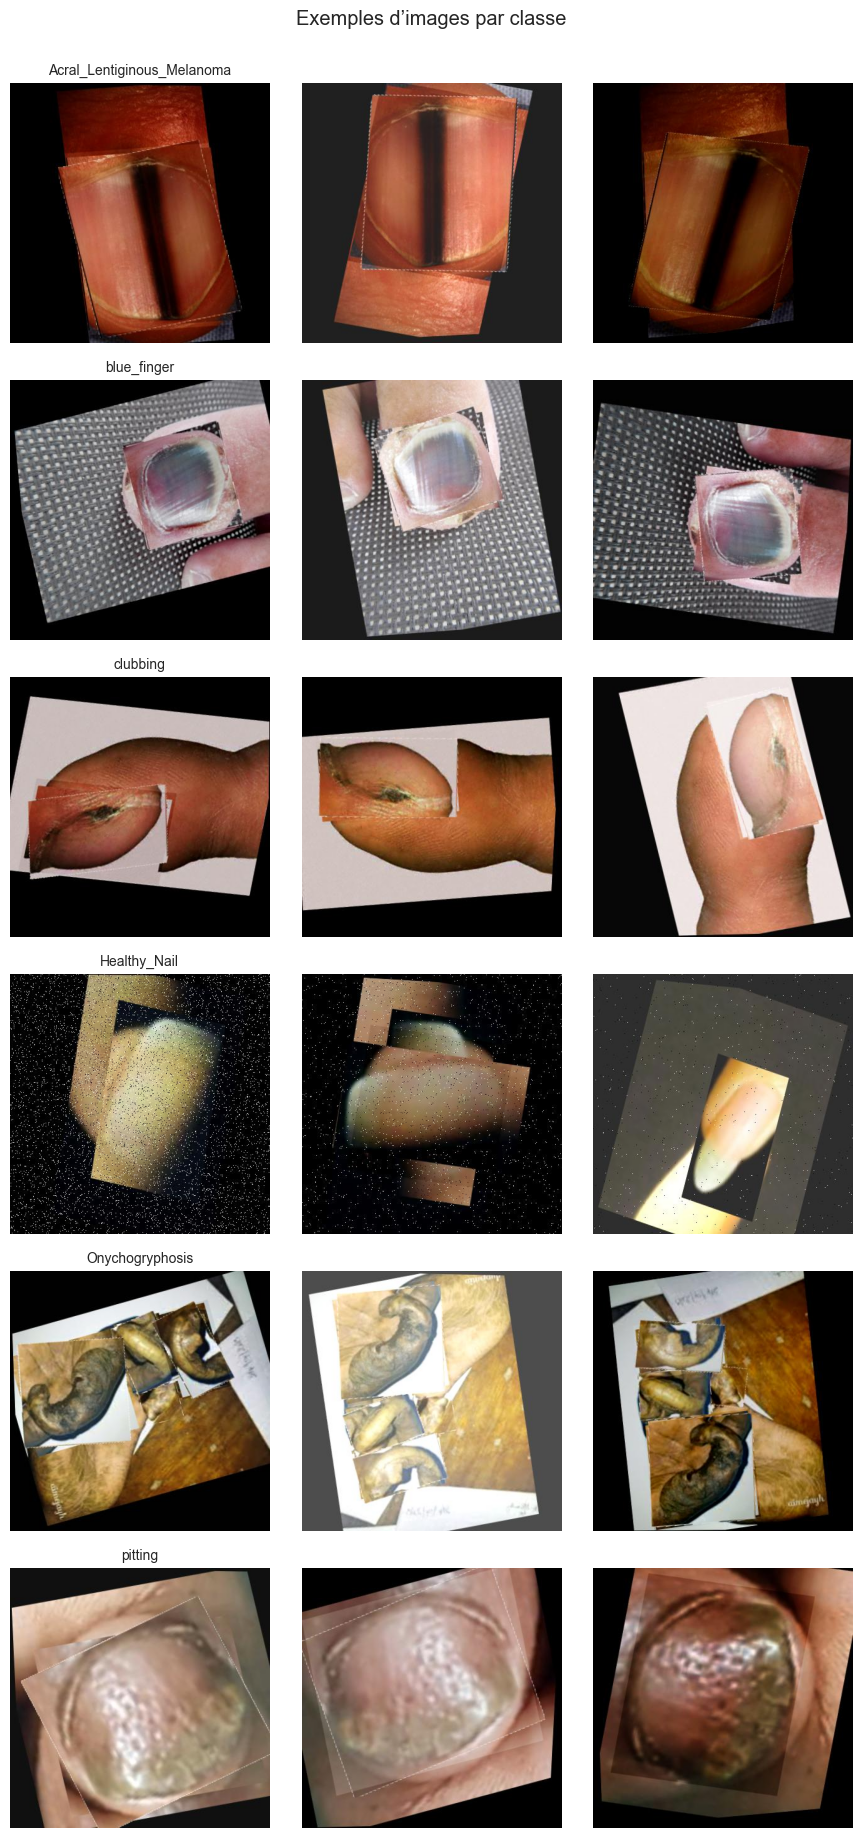

In [7]:
# 🖼️ 5. Afficher quelques exemples d’images par classe
import random


def plot_sample_images(base_path, class_names, n=3):
    fig, axs = plt.subplots(len(class_names), n,
                            figsize=(n * 3, len(class_names) * 3))
    for i, cls in enumerate(class_names):
        cls_path = base_path / cls
        images = list(cls_path.glob("*"))[:n]
        for j in range(n):
            img_path = images[j] if j < len(images) else None
            if img_path:
                img = Image.open(img_path)
                axs[i, j].imshow(img)
                axs[i, j].axis("off")
                if j == 0:
                    axs[i, j].set_title(cls, fontsize=10)
    plt.tight_layout()
    plt.suptitle("Exemples d’images par classe", y=1.02)
    plt.show()


plot_sample_images(base_path, class_names, n=3)

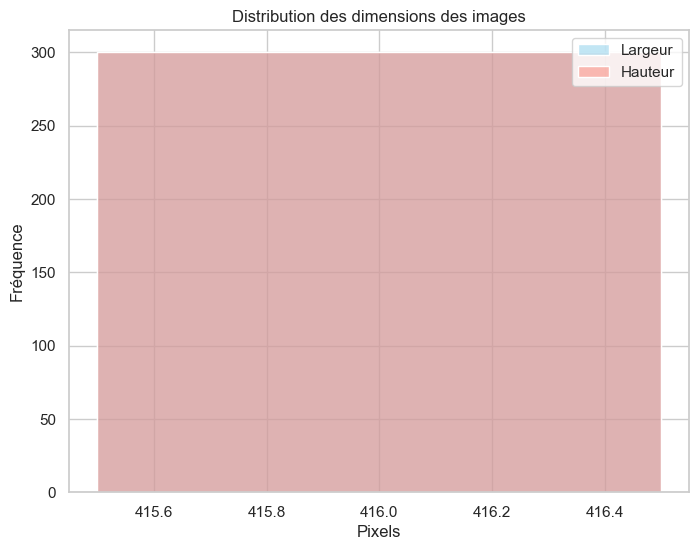

In [8]:
# 📐 6. Distribution des tailles d’images
image_shapes = []
for cls in class_names:
    # max 50 img par classe pour rapidité
    images = list((base_path / cls).glob("*"))[:50]
    for img_path in images:
        try:
            img = Image.open(img_path)
            image_shapes.append(img.size)
        except:
            continue

sizes_df = pd.DataFrame(image_shapes, columns=["width", "height"])

plt.figure(figsize=(8, 6))
sns.histplot(sizes_df["width"], kde=True, color="skyblue", label="Largeur")
sns.histplot(sizes_df["height"], kde=True, color="salmon", label="Hauteur")
plt.legend()
plt.title("Distribution des dimensions des images")
plt.xlabel("Pixels")
plt.ylabel("Fréquence")
plt.show()

In [9]:
# ⚖️ 7. Détection du déséquilibre
df_counts["Pourcentage"] = df_counts["Nb d'images"] / \
    df_counts["Nb d'images"].sum() * 100
print(df_counts.sort_values("Nb d'images"))

                       Classe  Nb d'images  Pourcentage
3                Healthy_Nail          323     8.627137
1                 blue_finger          603    16.105769
5                     pitting          639    17.067308
4             Onychogryphosis          677    18.082265
0  Acral_Lentiginous_Melanoma          735    19.631410
2                    clubbing          767    20.486111


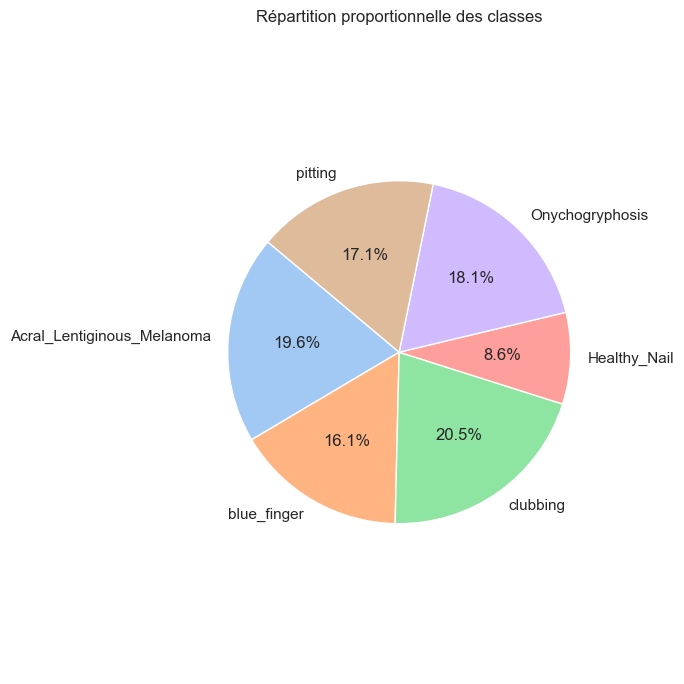

In [12]:
# 🥧 Diagramme circulaire : proportions des classes
plt.figure(figsize=(7, 7))
plt.pie(
    df_counts["Nb d'images"],
    labels=df_counts["Classe"],
    autopct="%1.1f%%",
    startangle=140,
    colors=sns.color_palette("pastel")[0:len(df_counts)]
)
plt.axis("equal")  # pour un cercle parfait
plt.title("Répartition proportionnelle des classes")
plt.tight_layout()
plt.show()

In [10]:
# 💡 8. Recommandations
print("\n🎯 Recommandations :")
if df_counts["Nb d'images"].max() / df_counts["Nb d'images"].min() > 2:
    print("- Le dataset est déséquilibré. Utilise la data augmentation (flip, rotation...) pour les classes minoritaires.")
else:
    print("- Le dataset est relativement équilibré.")


🎯 Recommandations :
- Le dataset est déséquilibré. Utilise la data augmentation (flip, rotation...) pour les classes minoritaires.
